# Data Therapy : A Study on Mental Health in the Tech Industry
Michaela Matocha, Alex Ling, Jennifer Martin, Jesus Sarmiento

## Overview & Motivation: 
The purpose of this project was to investigate the changes in mental health in those who work in the tech industry, and the services/support provided by employers over the time period from (2014, 2016-2019). This might be useful to look at for those who work in the tech industry as a way to mark improvements/decline in the industry - to see if more support needs to be added, or if the industry on average is doing well in this area.

We also looked at the change and differences in different demographics represented in these survey responses to see if different people are being supported equally or not.

Employers can benefit from knowing what they can improve in their companies. Employees can benefit from the changes employers make to improve mental health. If a specific demographic is disproportionately affected, the demographic would benefit from improvements that are targeted towards them.


## Initial Questions:
Is there a trend over the years of this survey?   
Is there a difference in mental health support for different demographics?  
Is there a certain area in which mental health support can be improved?  

## Data:
Our dataset originated from the Open Sourcing Mental Illness [survey](https://osmihelp.org/research). This group conducted this survey for the years 2014, and 2016-2019. A pre-cleaned and preprocessed version of this data was found on [Kaggle](https://www.kaggle.com/anth7310/mental-health-in-the-tech-industry). Using this Kaggle dataset, we combined the given csvs and split them by year. Inside the yearly CSVs, we removed responses from people who are self employed and/or not employed in the US. We also converted categorical data into numerical values.

## Exploratory Data Analysis:
We looked at the reports on the OSMI website (mainly just percentages for each answer choice -> [2019 Report](https://osmi.typeform.com/report/E1aoi6/8lZTgmG67MsOG7aH)) as well as going through by hand and looking at different responses. 

The dataset included a good amount of free response questions, and we thought it was worth trying word frequency analysis - but there ended up not being significant enough differences between years or questions to give us any further interesting results.

## Final Analysis:
Overall, the industry seems to be improving. Most of the graphs show an increase in positive responses. Most of the line graphs that showed the average rating per year had a positive trend. Most of the pie charts showed an increasing percentage of positive responses. Some minority demographics need more attention in certain areas. The tech industry could do more to help these people.

Overall, people in the tech industry had more or equally positive responses than those outside of the tech industry. This was a trend across years and different questions.

# Text Analysis

### Helper Functions

I did a good bit of consolidation into categories here:

* **Mood Disorder** includes Depression and Seasonal Affective Disorder  
* **Pervasive Developmental Disorder** includes Autism and Aspergers  
* **Dissociative Disorder** includes Depersonalization Disorder 
* **Personality Disorder** includes Schizotypal Personality Disorder

In [ ]:
import re
import pandas as pd

def cleanDisorders(disorder):
    disorder = re.sub("[\(\[].*?[\)\]]", "", str(disorder))
    disorder = disorder.rstrip()
    if disorder == 'Attention Deficit Hyperactivity Disorder':
        return 'ADHD'
    elif disorder == 'Post-traumatic Stress Disorder':
        return "PTSD"
    elif disorder == 'Obsessive-Compulsive Disorder':
        return "OCD"
    elif disorder == 'Anxiety Disorder':
        return "Anxiety"
    elif disorder == 'Autism' or disorder.lower() == 'autism spectrum disorder' or disorder == 'Asperges' or disorder == 'PDD-NOS':
        return 'Pervasive Developmental Disorder'
    elif disorder == 'Depression' or disorder == 'Seasonal Affective Disorder':
        return "Mood Disorder"
    elif disorder == 'Addictive Disorder' or disorder == 'Substance Use Disorder':
        return "Addiction or Substance Use"
    elif disorder.lower() == 'depersonalization disorder':
        return "Dissociative Disorder"
    elif disorder == 'Schizotypal Personality Disorder':
        return "Personality Disorder"
    else:
        return disorder
    
def loadData(filename):
    df = pd.read_csv(filename)
    print('\nShape:')
    print(df.shape)
    return df

def cleanAndGetCounts(df, qID, cleanFn):
    df[qID] = df[qID].apply(cleanFn)
    valCounts = df[qID].value_counts()
    valCounts = valCounts.iloc[1:]
    print(valCounts)
    return valCounts

### 2016 Diagnosed Mental Health Conditions

In [ ]:
df2016 = loadData('data/QA_2016.T.csv')
valCounts = cleanAndGetCounts(df2016, '115', cleanDisorders)

NameError: name 'loadData' is not defined

In [ ]:
valCounts.sort_values(ascending=False).head(12).plot(kind='bar')

NameError: name 'valCounts' is not defined

### 2016 Undiagnosed Mental Health Conditions

In [ ]:
df16 = loadData('data/QA_2016.T.csv')
valCts = cleanAndGetCounts(df16, '116', cleanDisorders)

NameError: name 'loadData' is not defined

In [ ]:
valCts.sort_values(ascending=False).head(11).plot(kind='bar')

NameError: name 'valCts' is not defined

# Next Section

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import numpy as np
import seaborn as sns
import plotly.express as px

def load_data(url):
    url_content = requests.get(url).text



    #with open()
    data = pd.read_csv(url,encoding='utf-8')
    return data
#data.head()

In [ ]:
def clean_data(df):
    df = df.replace('-1',np.NaN)
    index = 0
    for row in df['3']:
        if row != 'United States of America':
            df.drop(index=index,inplace=True)
        index += 1
    data_index = df.index

    index = 0 
    for row in df['5']:
        if row == 1:
            df.drop(index=data_index[index],inplace=True)
        index += 1
    return df

In [ ]:
def q_17(data):
    comfort_sum = 0
    comfort_count = 0
    for row in data['19']:
        if row == 'Yes':
            comfort_sum += 100
        elif row == 'Maybe':
            comfort_sum += 50
        elif row == 'No':
            comfort_sum += 0
        comfort_count  += 1
    if comfort_count == 0:
        avg_comfort = 0
    else:
        avg_comfort = comfort_sum/comfort_count
    #print(avg_comfort)
    comfort_coworkers = avg_comfort
    return comfort_coworkers
def q_17_size(data):
    comfort_sum = 0
    comfort_count = 0
    for row in data:
        if row == 'Yes':
            comfort_sum += 100
        elif row == 'Maybe':
            comfort_sum += 50
        elif row == 'No':
            comfort_sum += 0
        comfort_count  += 1
    if comfort_count == 0:
        avg_comfort = 0
    else:
        avg_comfort = comfort_sum/comfort_count
    #print(avg_comfort)
    comfort_coworkers = avg_comfort
    return comfort_coworkers
def pie_17(data):
    yes = 0
    maybe = 0
    no = 0
    for row in data['19']:
        if row == 'Yes':
            yes += 1
        elif row == 'Maybe':
            maybe += 1
        elif row == 'No':
            no += 1
    return [yes,maybe,no]

In [ ]:
def q_16(data):
    comfort_sum = 0
    comfort_count = 0
    for row in data['16']:
        if row == 'Yes':
            comfort_sum += 100
        elif row == 'I don\'t know':
            comfort_sum += 50
        elif row == 'No':
            comfort_sum += 0
        comfort_count  += 1
    if comfort_count == 0:
        avg_comfort = 0
    else:
        avg_comfort = comfort_sum/comfort_count
    
    comfort_coworkers = avg_comfort
    return comfort_coworkers
def pie_16(data):
    yes = 0
    maybe = 0
    no = 0
    for row in data['16']:
        if row == 'Yes':
            yes += 1
        elif row == 'I don\'t know':
            maybe += 1
        elif row == 'No':
            no += 1
    return [yes,maybe,no]

In [ ]:
def q_18(data):
    comfort_sum = 0
    comfort_count = 0
    for row in data['18']:
        if row == 'Yes':
            comfort_sum += 100
        elif row == 'Maybe':
            comfort_sum += 50
        elif row == 'No':
            comfort_sum += 0
        comfort_count  += 1
    if comfort_count == 0:
        avg_comfort = 0
    else:
        avg_comfort = comfort_sum/comfort_count
    
    comfort_coworkers = avg_comfort
    return comfort_coworkers
def pie_18(data):
    yes = 0
    maybe = 0
    no = 0
    for row in data['18']:
        if row == 'Yes':
            yes += 1
        elif row == 'Maybe':
            maybe += 1
        elif row == 'No':
            no += 1
    return [yes,maybe,no]

In [ ]:
def q_56(data):
    employer_mental_phys_sum = 0
    employer_ment_phys_count = 0
    for row in data['69']:
        if row == 'Mental health':
            employer_mental_phys_sum += 50
        elif row == 'Physical health':
            employer_mental_phys_sum += 0
        elif row == 'Same level of comfort for each':
            employer_mental_phys_sum += 100
        employer_ment_phys_count += 1
    if employer_ment_phys_count == 0:
        avg_employer_ment_phys = 0
    else:
        avg_employer_ment_phys = employer_mental_phys_sum / employer_ment_phys_count
    return avg_employer_ment_phys
def pie_56(data):
    mental = 0
    physical = 0
    same = 0
    for row in data['69']:
        if row == 'Mental health':
            mental += 1
        elif row == 'Physical health':
            physical += 1
        elif row == 'Same level of comfort for each':
            same += 1
    return [mental,physical,same]

In [ ]:
def q_72(data):
    sum_ = 0
    count = 0
    for row in data['85']:
        if row == 1:
            sum_ += 0
        elif row == 2:
            sum_ += 25
        elif row == 3:
            sum_ += 50
        elif row == 4:
            sum_ += 75
        elif row == 5:
            sum_ += 100
        count += 1
    
    if count == 0:
        avg = 0
    else:
        avg = sum_ / count
    return avg
def pie_72(data):
    one = 0
    two = 0
    three = 0
    four = 0
    five = 0
    for row in data['85']:
        if row == 1:
            one += 1
        elif row == 2:
            two += 1
        elif row == 3:
            three += 1
        elif row == 4:
            four += 1
        elif row == 5:
            five += 1
    return [one,two,three,four,five]

In [ ]:
url_16 = "https://raw.githubusercontent.com/mich-matocha/data-therapy/main/data/QA_2016.T.csv"
url_17 = "https://raw.githubusercontent.com/mich-matocha/data-therapy/main/data/QA_2017.T.csv"
url_18 = "https://raw.githubusercontent.com/mich-matocha/data-therapy/main/data/QA_2018.T.csv"
url_19 = "https://raw.githubusercontent.com/mich-matocha/data-therapy/main/data/QA_2019.T.csv"

data_16 = load_data(url_16)
data_17 = load_data(url_17)
data_18 = load_data(url_18)
data_19 = load_data(url_19)

data_16 = clean_data(data_16)
data_17 = clean_data(data_17)
data_18 = clean_data(data_18)
data_19 = clean_data(data_19)

In [ ]:
def split_tech_non(df):
    # Tech, Non-Tech
    return df.loc[df['9'] == 1].copy(), df.loc[df['9'] == 0].copy()


data_16_t, data_16_n = split_tech_non(data_16)
data_17_t, data_17_n = split_tech_non(data_17)
data_18_t, data_18_n = split_tech_non(data_18)
data_19_t, data_19_n = split_tech_non(data_19)

In [ ]:
company_size = {
    '1-5': '1-5',
    '6-25': '6-25',
    '26-100': '26-100',
    '100-500': '100-500',
    '500-1000': '500-1000',
    'More than 1000': '1000+'
}

In [ ]:
def pie_by_size(df, _id):
    subset = df.dropna(subset=['8', _id])
    values = []
    for k, v in company_size.items():
        values.append(subset.loc[subset['8'] == k][['1', _id]].groupby(_id).count().values.flatten())
        
    return values

In [ ]:
def pie_by_gender(df, _id):
    subset = df.dropna(subset=['2', _id])

    _m = subset.loc[subset['2'] == 'Male'].groupby(_id).count()['UserID'].values
    _f = subset.loc[subset['2'] == 'Female'].groupby(_id).count()['UserID'].values
    _q = subset[~subset['2'].str.contains('Male|Female')].groupby(_id).count()['UserID'].values
    
    return _m, _f, _q

Would you feel comfortable discussing a mental health issue with your direct supervisor(s)? Tech vs Non Tech


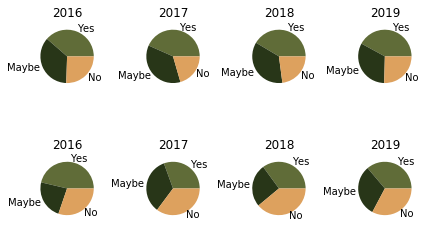

In [ ]:
q_17_list_nontech = []
q_17_list_tech = []

q_17_list_nontech.append(q_17(data_16_n))
q_17_list_nontech.append(q_17(data_17_n))
q_17_list_nontech.append(q_17(data_18_n))
q_17_list_nontech.append(q_17(data_19_n))

q_17_list_tech.append(q_17(data_16_t))
q_17_list_tech.append(q_17(data_17_t))
q_17_list_tech.append(q_17(data_18_t))
q_17_list_tech.append(q_17(data_19_t))

years = [2016,2017,2018,2019]
#plt.plot(years,q_17_list)

pie_17_list16_t = pie_17(data_16_t)
pie_17_list16_n = pie_17(data_16_n)
pie_17_list17_t = pie_17(data_17_t)
pie_17_list17_n = pie_17(data_17_n)
pie_17_list18_t = pie_17(data_18_t)
pie_17_list18_n = pie_17(data_18_n)
pie_17_list19_t = pie_17(data_19_t)
pie_17_list19_n = pie_17(data_19_n)
answers = ['Yes','Maybe','No']
# referenced https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python
plt.title('Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?')
print('Would you feel comfortable discussing a mental health issue with your direct supervisor(s)? Tech vs Non Tech')
plt.subplot(2,4,1)
plt.pie(pie_17_list16_t,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2016')
plt.subplot(2,4,2)
plt.pie(pie_17_list17_t,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2017')
plt.subplot(2,4,3)
plt.pie(pie_17_list18_t,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2018')
plt.subplot(2,4,4)
plt.pie(pie_17_list19_t,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2019')
plt.subplot(2,4,5)
plt.pie(pie_17_list16_n,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2016')
plt.subplot(2,4,6)
plt.pie(pie_17_list17_n,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2017')
plt.subplot(2,4,7)
plt.pie(pie_17_list18_n,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2018')
plt.subplot(2,4,8)
plt.pie(pie_17_list19_n,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2019')
plt.tight_layout()

Would you feel comfortable discussing a mental health issue with your direct supervisor(s)? (by number of employees in the company)
Row 1: 2016
Row 2: 2017
Row 3: 2018
Row 4: 2019


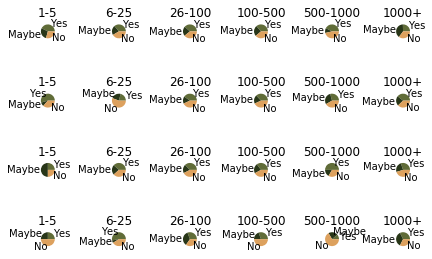

In [ ]:
pie_16_19 = pie_by_size(data_16_t,'19')
pie_17_19 = pie_by_size(data_17_t,'19')
pie_18_19 = pie_by_size(data_18_t,'19')
pie_19_19 = pie_by_size(data_19_t,'19')

answers = ['Yes','Maybe','No']
plt.title('Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?')
print('Would you feel comfortable discussing a mental health issue with your direct supervisor(s)? (by number of employees in the company)')
print('Row 1: 2016')
plt.subplot(4,6,1)
plt.pie(pie_16_19[0],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('1-5')
plt.subplot(4,6,2)
plt.pie(pie_16_19[1],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('6-25')
plt.subplot(4,6,3)
plt.pie(pie_16_19[2],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('26-100')
plt.subplot(4,6,4)
plt.pie(pie_16_19[3],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('100-500')
plt.subplot(4,6,5)
plt.pie(pie_16_19[4],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('500-1000')
plt.subplot(4,6,6)
plt.pie(pie_16_19[5],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('1000+')

print('Row 2: 2017')
plt.subplot(4,6,7)
plt.pie(pie_17_19[0],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('1-5')
plt.subplot(4,6,8)
plt.pie(pie_17_19[1],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('6-25')
plt.subplot(4,6,9)
plt.pie(pie_17_19[2],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('26-100')
plt.subplot(4,6,10)
plt.pie(pie_17_19[3],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('100-500')
plt.subplot(4,6,11)
plt.pie(pie_17_19[4],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('500-1000')
plt.subplot(4,6,12)
plt.pie(pie_17_19[5],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('1000+')

print('Row 3: 2018')
plt.subplot(4,6,13)
plt.pie(pie_18_19[0],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('1-5')
plt.subplot(4,6,14)
plt.pie(pie_18_19[1],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('6-25')
plt.subplot(4,6,15)
plt.pie(pie_18_19[2],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('26-100')
plt.subplot(4,6,16)
plt.pie(pie_18_19[3],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('100-500')
plt.subplot(4,6,17)
plt.pie(pie_18_19[4],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('500-1000')
plt.subplot(4,6,18)
plt.pie(pie_18_19[5],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('1000+')

print('Row 4: 2019')
plt.subplot(4,6,19)
plt.pie(pie_19_19[0],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('1-5')
plt.subplot(4,6,20)
plt.pie(pie_19_19[1],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('6-25')
plt.subplot(4,6,21)
plt.pie(pie_19_19[2],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('26-100')
plt.subplot(4,6,22)
plt.pie(pie_19_19[3],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('100-500')
plt.subplot(4,6,23)
plt.pie(pie_19_19[4],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('500-1000')
plt.subplot(4,6,24)
plt.pie(pie_19_19[5],labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('1000+')
plt.tight_layout()

Text(0.5, 1.0, 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)? (Over time)')

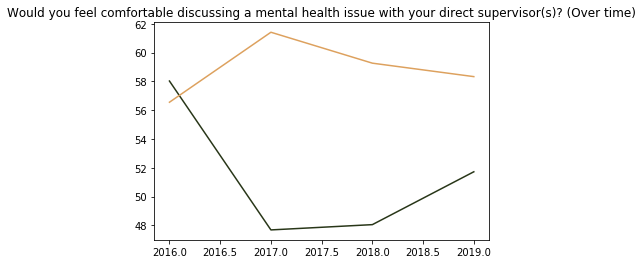

In [ ]:
plt.plot(years,q_17_list_nontech, color='#283618')
plt.plot(years,q_17_list_tech, color='#dda15e')
plt.title('Would you feel comfortable discussing a mental health issue with your direct supervisor(s)? (Over time)')
#q_17_data = pd.DataFrame(q_17_list,index=years)

Would you feel comfortable discussing a mental health issue with your coworkers? Tech vs Non Tech


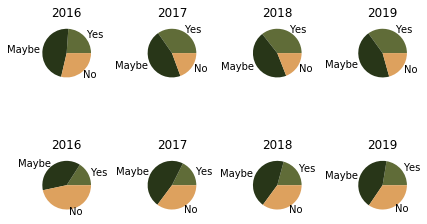

In [ ]:
import plotly.express as px


q_18_list_nontech = []
q_18_list_tech = []

#q_17_list.append(q_17(data_16.query('9 == 1',inplace=True)))
q_18_list_nontech.append(q_18(data_16_n))
q_18_list_nontech.append(q_18(data_17_n))
q_18_list_nontech.append(q_18(data_18_n))
q_18_list_nontech.append(q_18(data_19_n))

q_18_list_tech.append(q_18(data_16_t))
q_18_list_tech.append(q_18(data_17_t))
q_18_list_tech.append(q_18(data_18_t))
q_18_list_tech.append(q_18(data_19_t))

years = [2016,2017,2018,2019]
#plt.plot(years,q_18_list)

pie_18_list16_t = pie_18(data_16_t)
pie_18_list16_n = pie_18(data_16_n)
pie_18_list17_t = pie_18(data_17_t)
pie_18_list17_n = pie_18(data_17_n)
pie_18_list18_t = pie_18(data_18_t)
pie_18_list18_n = pie_18(data_18_n)
pie_18_list19_t = pie_18(data_19_t)
pie_18_list19_n = pie_18(data_19_n)
answers = ['Yes','Maybe','No']
# referenced https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python
plt.title('Would you feel comfortable discussing a mental health issue with your coworkers? Tech vs Non Tech')
print('Would you feel comfortable discussing a mental health issue with your coworkers? Tech vs Non Tech')
plt.subplot(2,4,1)
plt.pie(pie_18_list16_t,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2016')
plt.subplot(2,4,2)
plt.pie(pie_18_list17_t,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2017')
plt.subplot(2,4,3)
plt.pie(pie_18_list18_t,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2018')
plt.subplot(2,4,4)
plt.pie(pie_18_list19_t,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2019')
plt.subplot(2,4,5)
plt.pie(pie_18_list16_n,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2016')
plt.subplot(2,4,6)
plt.pie(pie_18_list17_n,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2017')
plt.subplot(2,4,7)
plt.pie(pie_18_list18_n,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2018')
plt.subplot(2,4,8)
plt.pie(pie_18_list19_n,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2019')
plt.tight_layout()


Text(0.5, 1.0, 'Would you feel comfortable discussing a mental health issue with your coworkers? (Over time)')

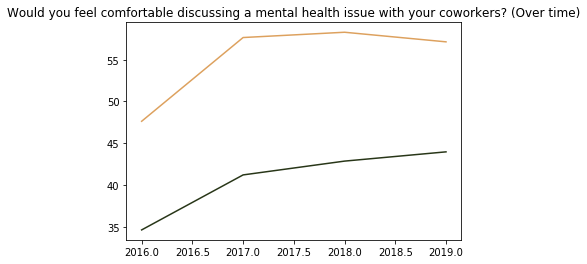

In [ ]:
plt.plot(years,q_18_list_nontech, color='#283618')
plt.plot(years,q_18_list_tech, color='#dda15e')
plt.title('Would you feel comfortable discussing a mental health issue with your coworkers? (Over time)')

Overall, how well do you think the tech industry supports employees with mental health issues? Tech vs Non Tech


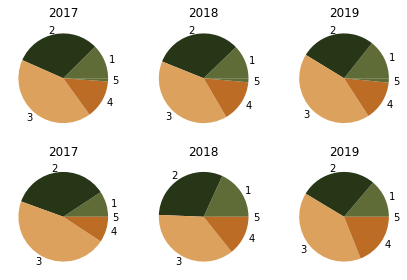

In [ ]:
q_72_list_nontech = []
q_72_list_tech = []

#q_17_list.append(q_17(data_16.query('9 == 1',inplace=True)))

q_72_list_nontech.append(q_72(data_17_n))
q_72_list_nontech.append(q_72(data_18_n))
q_72_list_nontech.append(q_72(data_19_n))


q_72_list_tech.append(q_72(data_17_t))
q_72_list_tech.append(q_72(data_18_t))
q_72_list_tech.append(q_72(data_19_t))

years = [2017,2018,2019]
plt.plot(years,q_72_list_nontech)
plt.plot(years,q_72_list_tech)


pie_72_list17_t = pie_72(data_17_t)
pie_72_list17_n = pie_72(data_17_n)
pie_72_list18_t = pie_72(data_18_t)
pie_72_list18_n = pie_72(data_18_n)
pie_72_list19_t = pie_72(data_19_t)
pie_72_list19_n = pie_72(data_19_n)
answers = [1,2,3,4,5]
# referenced https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python
plt.title('Overall, how well do you think the tech industry supports employees with mental health issues? Tech vs Non Tech')
print('Overall, how well do you think the tech industry supports employees with mental health issues? Tech vs Non Tech')

plt.subplot(2,3,1)
plt.pie(pie_72_list17_t,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2017')
plt.subplot(2,3,2)
plt.pie(pie_72_list18_t,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2018')
plt.subplot(2,3,3)
plt.pie(pie_72_list19_t,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2019')

plt.subplot(2,3,4)
plt.pie(pie_72_list17_n,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2017')
plt.subplot(2,3,5)
plt.pie(pie_72_list18_n,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2018')
plt.subplot(2,3,6)
plt.pie(pie_72_list19_n,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2019')
plt.tight_layout()

Text(0.5, 1.0, 'Overall, how well do you think the tech industry supports employees with mental health issues? (Over time)')

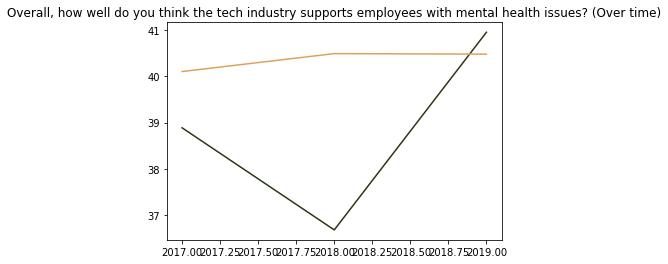

In [ ]:
plt.plot(years,q_72_list_nontech, color='#283618')
plt.plot(years,q_72_list_tech, color='#dda15e')
plt.title('Overall, how well do you think the tech industry supports employees with mental health issues? (Over time)')

Would you feel comfortable discussing a mental health issue with your direct supervisor(s)? Tech vs Non Tech


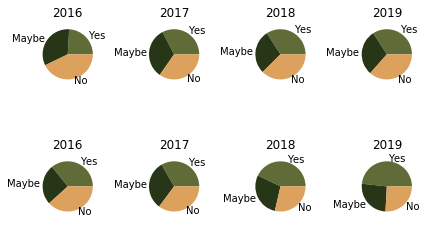

In [ ]:
q_16_list_nontech = []
q_16_list_tech = []

#q_17_list.append(q_17(data_16.query('9 == 1',inplace=True)))
q_16_list_nontech.append(q_16(data_16_n))
q_16_list_nontech.append(q_16(data_17_n))
q_16_list_nontech.append(q_16(data_18_n))
q_16_list_nontech.append(q_16(data_19_n))

q_16_list_tech.append(q_16(data_16_t))
q_16_list_tech.append(q_16(data_17_t))
q_16_list_tech.append(q_16(data_18_t))
q_16_list_tech.append(q_16(data_19_t))

years = [2016,2017,2018,2019]
plt.plot(years,q_16_list_nontech)
plt.plot(years,q_16_list_tech)

pie_16_list16_t = pie_16(data_16_t)
pie_16_list16_n = pie_16(data_16_n)
pie_16_list17_t = pie_16(data_17_t)
pie_16_list17_n = pie_16(data_17_n)
pie_16_list18_t = pie_16(data_18_t)
pie_16_list18_n = pie_16(data_18_n)
pie_16_list19_t = pie_16(data_19_t)
pie_16_list19_n = pie_16(data_19_n)
answers = ['Yes','Maybe','No']
# referenced https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python
plt.title('Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?')
print('Would you feel comfortable discussing a mental health issue with your direct supervisor(s)? Tech vs Non Tech')
plt.subplot(2,4,1)
plt.pie(pie_16_list16_t,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2016')
plt.subplot(2,4,2)
plt.pie(pie_16_list17_t,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2017')
plt.subplot(2,4,3)
plt.pie(pie_16_list18_t,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2018')
plt.subplot(2,4,4)
plt.pie(pie_16_list19_t,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2019')
plt.subplot(2,4,5)
plt.pie(pie_16_list16_n,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2016')
plt.subplot(2,4,6)
plt.pie(pie_16_list17_n,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2017')
plt.subplot(2,4,7)
plt.pie(pie_16_list18_n,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2018')
plt.subplot(2,4,8)
plt.pie(pie_16_list19_n,labels=answers, colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
plt.title('2019')
plt.tight_layout()

Text(0.5, 1.0, 'Does your employer offer resources to learn more about mental health disorders and options for seeking ')

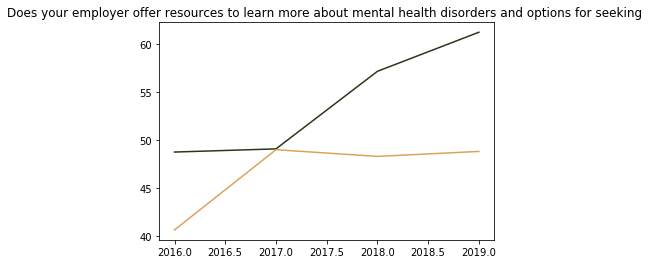

In [ ]:
plt.plot(years,q_16_list_nontech, color='#283618')
plt.plot(years,q_16_list_tech, color='#dda15e')
plt.title('Does your employer offer resources to learn more about mental health disorders and options for seeking ')

In [ ]:
def convert_56(data):
    index = 0
    index_list = data.index
    for row in data['69']:
        if row == 'Mental health':
            data.replace(row,50,inplace=True)
        elif row == 'Physical health':
            data.replace(row,0,inplace=True)
        elif row == 'Same level of comfort for each':
            data.replace(row,100,inplace=True)
        elif str(row) == 'nan':
            data.drop(index=index_list[index],inplace=True)
        index += 1
    return data

In [ ]:
def convert_16(data):
    index = 0
    index_list = data.index
    for row in data['16']:
        if row == 'Yes':
            data.replace(row,100,inplace=True)
        elif row == 'I don\'t know':
            data.replace(row,50,inplace=True)
        elif row == 'No':
            data.replace(row,0,inplace=True)
        elif str(row) == 'nan':
            data.drop(index=index_list[index],inplace=True)
        index += 1
    return data

In [ ]:
def convert_17(data):
    index = 0
    index_list = data.index
    for row in data['19']:
        if row == 'Yes':
            data.replace(row,100,inplace=True)
        elif row == 'Maybe':
            data.replace(row,50,inplace=True)
        elif row == 'No':
            data.replace(row,0,inplace=True)
        elif str(row) == 'nan':
            data.drop(index=index_list[index],inplace=True)
        index += 1
    return data

In [ ]:
def convert_18(data):
    index = 0
    index_list = data.index
    for row in data['18']:
        if row == 'Yes':
            data.replace(row,100,inplace=True)
        elif row == 'Maybe':
            data.replace(row,50,inplace=True)
        elif row == 'No':
            data.replace(row,0,inplace=True)
        elif str(row) == 'nan':
            data.drop(index=index_list[index],inplace=True)
        index += 1
    return data

In [ ]:
def convert_72(data):
    index = 0
    index_list = data.index
    for row in data['85']:
        if row == 1:
            data.replace(row,0,inplace=True)
        elif row == 2:
            data.replace(row,25,inplace=True)
        elif row == 3:
            data.replace(row,50,inplace=True)
        elif row == 4:
            data.replace(row,75,inplace=True)
        elif row == 5:
            data.replace(row,100,inplace=True)
        elif str(row) == 'nan':
            data.drop(index=index_list[index],inplace=True)
        index += 1
    return data

In [ ]:
data_17_t = convert_72(data_17_t)
data_18_t = convert_72(data_18_t)
data_19_t = convert_72(data_19_t)

data_16_t = convert_16(data_16_t)
data_17_t = convert_16(data_17_t)
data_18_t = convert_16(data_18_t)
data_19_t = convert_16(data_19_t)

data_16_t = convert_17(data_16_t)
data_17_t = convert_17(data_17_t)
data_18_t = convert_17(data_18_t)
data_19_t = convert_17(data_19_t)

data_16_t = convert_18(data_16_t)
data_17_t = convert_18(data_17_t)
data_18_t = convert_18(data_18_t)
data_19_t = convert_18(data_19_t)


data_17_t = convert_56(data_17_t)
data_18_t = convert_56(data_18_t)
data_19_t = convert_56(data_19_t)


In [ ]:
from sklearn.linear_model import LinearRegression
data_17_t = pd.DataFrame(data_17_t)
#print(data_17_t.index)
X = np.array(data_17_t['69']).reshape(-1,1)

lin_reg = LinearRegression().fit(X,data_17_t['85'])
y = data_17_t['85']
print('score:',lin_reg.score(X,data_17_t['85']))
X = data_17_t['69']
print('correlation:',X.corr(y))

score: 0.004316866088233784
correlation: 0.06570286210077773


In [ ]:
data_18_t = pd.DataFrame(data_18_t)
#print(data_17_t.index)
X = np.array(data_18_t['69']).reshape(-1,1)

lin_reg = LinearRegression().fit(X,data_18_t['85'])
y = data_18_t['85']
print('score:',lin_reg.score(X,data_18_t['85']))
X = data_18_t['69']
print('correlation:',X.corr(y))

score: 0.05335696594748085
correlation: 0.23099126811955642


In [ ]:
data_19_t = pd.DataFrame(data_19_t)
#print(data_17_t.index)
X = np.array(data_19_t['69']).reshape(-1,1)

lin_reg = LinearRegression().fit(X,data_19_t['85'])
y = data_19_t['85']
print('score:',lin_reg.score(X,data_19_t['85']))
X = data_19_t['69']
print('correlation:',X.corr(y))

score: 0.001488488599249882
correlation: 0.038580935696920025


In [ ]:
data_16_t = pd.DataFrame(data_16_t)
#print(data_17_t.index)
X = np.array(data_16_t['16']).reshape(-1,1)

lin_reg = LinearRegression().fit(X,data_16_t['19'])
y = data_16_t['19']
print('score:',lin_reg.score(X,data_16_t['19']))
X = data_16_t['16']
print('correlation:',X.corr(y))

score: 0.00892958551337486
correlation: 0.09449648413234749


In [ ]:
data_17_t = pd.DataFrame(data_17_t)
#print(data_17_t.index)
X = np.array(data_17_t['16']).reshape(-1,1)

lin_reg = LinearRegression().fit(X,data_17_t['19'])
y = data_17_t['19']
print('score:',lin_reg.score(X,data_17_t['19']))
X = data_17_t['16']
print('correlation:',X.corr(y))

score: 0.014374420501350516
correlation: 0.11989337138203492


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

df_2014 = pd.read_csv('https://raw.githubusercontent.com/mich-matocha/data-therapy/main/data/QA_2014_clean.csv', encoding='utf-8')
df_2016 = pd.read_csv('https://raw.githubusercontent.com/mich-matocha/data-therapy/main/data/QA_2016_clean.csv', encoding='utf-8')
df_2017 = pd.read_csv('https://raw.githubusercontent.com/mich-matocha/data-therapy/main/data/QA_2017_clean.csv', encoding='utf-8')
df_2018 = pd.read_csv('https://raw.githubusercontent.com/mich-matocha/data-therapy/main/data/QA_2018_clean.csv', encoding='utf-8')
df_2019 = pd.read_csv('https://raw.githubusercontent.com/mich-matocha/data-therapy/main/data/QA_2019_clean.csv', encoding='utf-8')

def split_tech_non(df):
    # Tech, Non-Tech
    return df.loc[df['9'] == 1].copy(), df.loc[df['9'] == 0].copy()

df_2014_t, df_2014_n = split_tech_non(df_2014)
df_2016_t, df_2016_n = split_tech_non(df_2016)
df_2017_t, df_2017_n = split_tech_non(df_2017)
df_2018_t, df_2018_n = split_tech_non(df_2018)
df_2019_t, df_2019_n = split_tech_non(df_2019)

company_size = {
    '1-5': '1-5',
    '6-25': '6-25',
    '26-100': '26-100',
    '100-500': '100-500',
    '500-1000': '500-1000',
    'More than 1000': '1000+'
}

def pie_by_size(df, _id):
    subset = df.dropna(subset=['8', _id])
    values = []
    for k, v in company_size.items():
        values.append(subset.loc[subset['8'] == k][['1', _id]].groupby(_id).count().values.flatten())
        
    return values

def pie_by_gender(df, _id):
    subset = df.dropna(subset=['2', _id])

    _m = subset.loc[subset['2'] == 'Male'].groupby(_id).count()['UserID'].values
    _f = subset.loc[subset['2'] == 'Female'].groupby(_id).count()['UserID'].values
    _o = subset[~subset['2'].str.contains('Male|Female')].groupby(_id).count()['UserID'].values
    
    return _m, _f, _o

## Question 64, 65

64 - Overall, how much importance does your employer place on physical health? (0-10)

65 - Overall, how much importance does your employer place on mental health? (0-10)

### Comparing Tech Companies to Non-Tech Companies

When comparing the perceived importance on mental and physical health between tech and non-tech companies, we can see that employees of both types of companies think that their employers put less emphasis on mental health than physical health. However, it looks like tech companies place more importance on mental health compared to non-tech companies. Over the 3 years,  both types of companies don't seem to show any significant improvement over time.

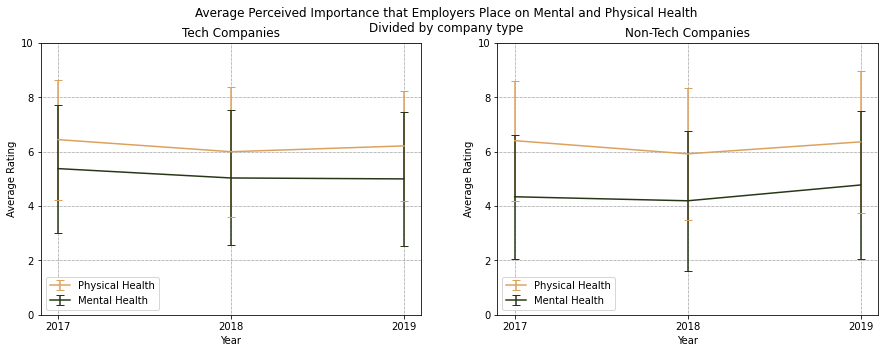

In [43]:
# Years
q6X_X = ['2017', '2018', '2019']
# Prepare our plots
fig, (left, right) = plt.subplots(1, 2, figsize=(15,5))

# Mean and Standard Deviation of scores across years 2017-2019
# Compare Mental and Physical Health
# Compare Tech and Non-Tech companies
# Left is Tech, right is Non-Tech
left.errorbar(
    q6X_X,
    [df_2017_t['64'].mean(), df_2018_t['64'].mean(), df_2019_t['64'].mean()],
    [df_2017_t['64'].std(), df_2018_t['64'].std(), df_2019_t['64'].std()],
    capsize=4,
    label='Physical Health',
    color='#dda15e'
)
left.errorbar(
    q6X_X,
    [df_2017_t['65'].mean(), df_2018_t['65'].mean(), df_2019_t['65'].mean()],
    [df_2017_t['65'].std(), df_2018_t['65'].std(), df_2019_t['65'].std()],
    capsize=4,
    label='Mental Health',
    color='#283618'
)
left.set_xlabel('Year')
left.set_ylabel('Average Rating')
left.set_ylim(0, 10)
left.grid(which='major', linestyle=':', linewidth='0.5', color='black')
left.legend(loc='lower left')
left.set_title('Tech Companies')

right.errorbar(
    q6X_X,
    [df_2017_n['64'].mean(), df_2018_n['64'].mean(), df_2019_n['64'].mean()],
    [df_2017_n['64'].std(), df_2018_n['64'].std(), df_2019_n['64'].std()],
    capsize=4,
    label='Physical Health',
    color='#dda15e'
)
right.errorbar(
    q6X_X,
    [df_2017_n['65'].mean(), df_2018_n['65'].mean(), df_2019_n['65'].mean()],
    [df_2017_n['65'].std(), df_2018_n['65'].std(), df_2019_n['65'].std()],
    capsize=4,
    label='Mental Health',
    color='#283618'
)
right.set_xlabel('Year')
right.set_ylabel('Average Rating')
right.set_ylim(0, 10)
right.grid(which='major', linestyle=':', linewidth='0.5', color='black')
right.legend()
right.set_title('Non-Tech Companies')

plt.suptitle('Average Perceived Importance that Employers Place on Mental and Physical Health\nDivided by company type')
# plt.tight_layout()
plt.show()

### Within Tech Companies, comparing between company sizes

#### Consolidated

When looking at each size of company, we can see that the larger the company, the more importance physical health has. Regarding mental health, this doesn't seem to be the case, and the level of importance over the years seems seemingly random.

In [44]:
# Helper functions to get means and standard deviations
def q6X_means(dfs, years, _id):
    new_dfs = []
    for index, df in enumerate(dfs):
        temp = df[['8', _id]].groupby('8').mean().copy()
        new_dfs.append(temp.rename(columns={_id: years[index]}))
    return pd.concat(new_dfs, axis=1).transpose(copy=True)
    
def q6X_std(dfs, years, _id):
    new_dfs = []
    for index, df in enumerate(dfs):
        temp = df[['8', _id]].groupby('8').std().copy()
        new_dfs.append(temp.rename(columns={_id: years[index]}))
    return pd.concat(new_dfs, axis=1).transpose(copy=True)

# Break down means and stds by company size
def q6X_size(dfs, years, _id):
    _means = []
    _stds  = []
    for index, df in enumerate(dfs):
        m_temp = df[['8', _id]].groupby('8').mean().copy()
        _means.append(m_temp.rename(columns={_id: years[index]}))
        
        s_temp = df[['8', _id]].groupby('8').std().copy()
        _stds.append(s_temp.rename(columns={_id: years[index]}))
    return pd.concat(_means, axis=1).transpose(copy=True), pd.concat(_stds, axis=1).transpose(copy=True)

q6X_dfs = [df_2017_t, df_2018_t, df_2019_t]
q64_m_171819, q64_s_171819 = q6X_size(q6X_dfs, q6X_X, '64')
q65_m_171819, q65_s_171819 = q6X_size(q6X_dfs, q6X_X, '65')

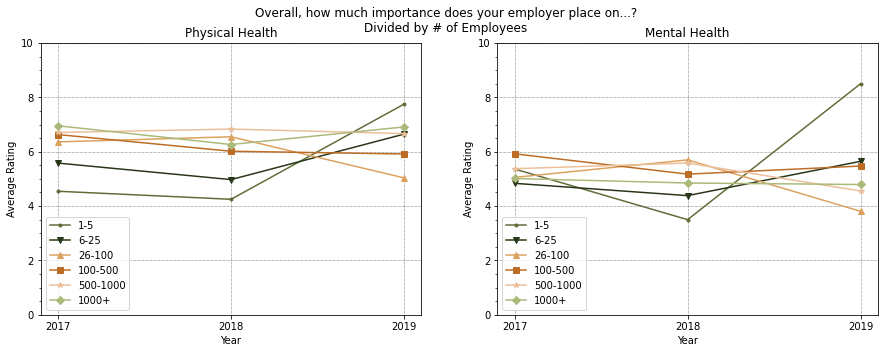

In [45]:
# Prepare our plots
fig, (left, right) = plt.subplots(1, 2, figsize=(15,5))
q6X_markers = ['.', 'v', '^', 's', '*', 'D']
colors = ['#606c38', '#283618', '#dda15e', '#bc6c25', '#ebbf99', '#abb979']

# Enumerate over company sizes and plot average rating for physical health
for i, (k, v) in enumerate(company_size.items()):
    left.plot(q6X_X, q64_m_171819[k], label=v, marker=q6X_markers[i], color=colors[i])
left.set_xlabel('Year')
left.set_ylabel('Average Rating')
left.set_ylim(0, 10)
left.set_yticks(np.arange(0, 10, 0.5), minor=True)
left.grid(which='major', linestyle=':', linewidth='0.5', color='black')
left.legend()
left.set_title('Physical Health')

# Enumerate over company sizes and plot average rating for mental health
for i, (k, v) in enumerate(company_size.items()):
    right.plot(q6X_X, q65_m_171819[k], label=v, marker=q6X_markers[i], color=colors[i])
right.set_xlabel('Year')
right.set_ylabel('Average Rating')
right.set_ylim(0, 10)
right.set_yticks(np.arange(0, 10, 0.5), minor=True)
right.grid(which='major', linestyle=':', linewidth='0.5', color='black')
right.legend(loc='lower left')
right.set_title('Mental Health')

plt.suptitle('Overall, how much importance does your employer place on...?\nDivided by # of Employees')
# plt.tight_layout()
plt.show()

#### Breakdown

Looking at each company size in its' own separate graph, we can see that the gap between physical and mental health increases as company sizes increase. This behavior is consistent over all 3 years, except for the very small companies (size 1-5)

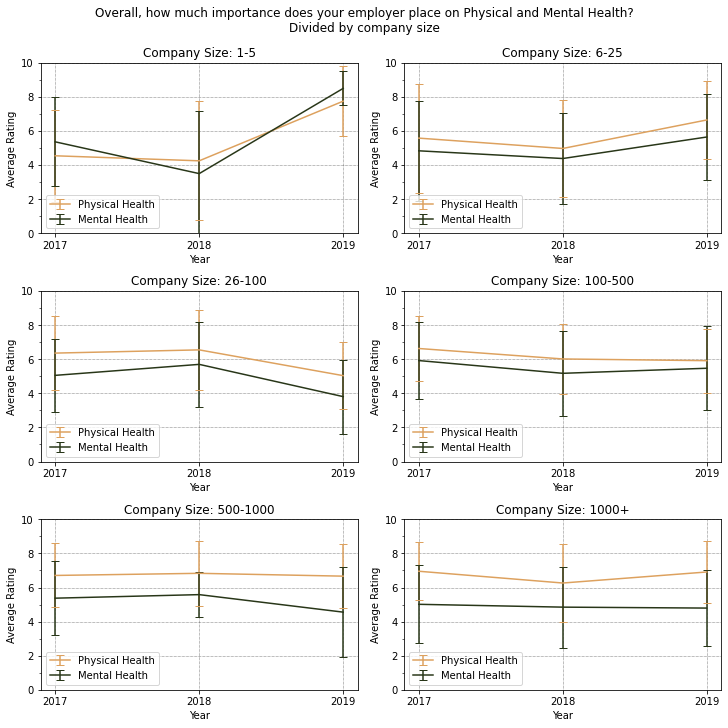

In [46]:
# Prepare our plots
fig, axs = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)

# Plot every company size's mean and std
# Compare mental and physical health
for index, (k, v) in enumerate(company_size.items()):
    _y = index // 2
    _x = index % 2
    axs[_y, _x].errorbar(q6X_X, q64_m_171819[k], q64_s_171819[k], capsize=4, label='Physical Health', color='#dda15e')
    axs[_y, _x].errorbar(q6X_X, q65_m_171819[k], q65_s_171819[k], capsize=4, label='Mental Health', color='#283618')
    axs[_y, _x].set_xlabel('Year')
    axs[_y, _x].set_ylabel('Average Rating')
    axs[_y, _x].set_ylim(0, 10)
    axs[_y, _x].set_yticks(np.arange(0, 10, 1), minor=True)
    axs[_y, _x].grid(which='major', linestyle=':', linewidth='0.5', color='black')
    axs[_y, _x].legend(loc='lower left')
    axs[_y, _x].set_title('Company Size: ' + v)
    
plt.suptitle('Overall, how much importance does your employer place on Physical and Mental Health?\nDivided by company size')
plt.show()

### Within Tech Companies, comparing between genders

Dividing this group by gender, we can see that the gap between perceived company importance on physical health and mental health still exists. However, according to males, it looks like they seem to perceive that the companies they work for place less importance on both types of health compared to the other genders.

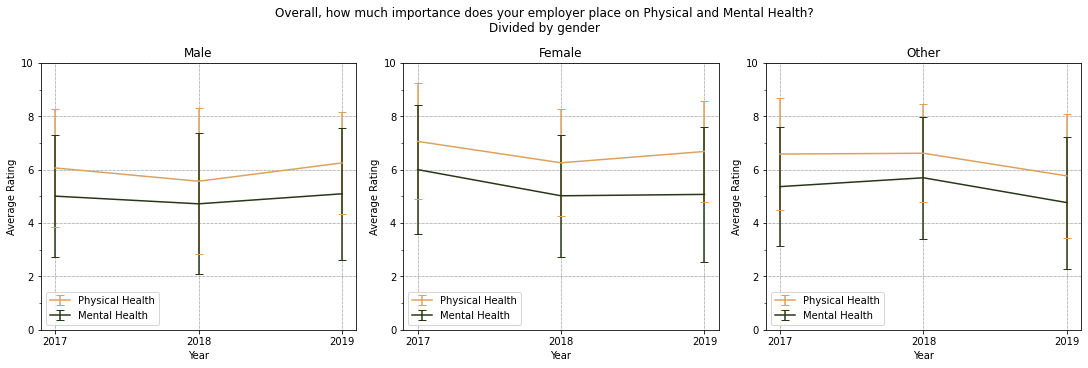

In [48]:
# Helper function for get means, stds for different genders
def q6X_gender(dfs, years, _id):
    mean = { 'Male': [], 'Female': [], 'Other': [] }
    std = { 'Male': [], 'Female': [], 'Other': [] }
    for index, df in enumerate(dfs):
        subset = df.dropna(subset=['2', _id])
        
        mean['Male'].append(subset.loc[subset['2'] == 'Male'][_id].mean())
        mean['Female'].append(subset.loc[subset['2'] == 'Female'][_id].mean())
        mean['Other'].append(subset[~subset['2'].str.contains('Male|Female')][_id].mean())
        
        std['Male'].append(subset.loc[subset['2'] == 'Male'][_id].std())
        std['Female'].append(subset.loc[subset['2'] == 'Female'][_id].std())
        std['Other'].append(subset[~subset['2'].str.contains('Male|Female')][_id].std())
        
    return mean, std

# Prepare out plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
# Get means, stds for each question
q6X_g_64_means, q6X_g_64_stds = q6X_gender(q6X_dfs, q6X_X, '64')
q6X_g_65_means, q6X_g_65_stds = q6X_gender(q6X_dfs, q6X_X, '65')

# For each gender, plot the average rating for physical and mental health
for idx, gender in enumerate(['Male', 'Female', 'Other']):
    axs[idx].errorbar(q6X_X, q6X_g_64_means[gender], q6X_g_64_stds[gender], capsize=4, label='Physical Health', color='#dda15e')
    axs[idx].errorbar(q6X_X, q6X_g_65_means[gender], q6X_g_65_stds[gender], capsize=4, label='Mental Health', color='#283618')
    axs[idx].set_xlabel('Year')
    axs[idx].set_ylabel('Average Rating')
    axs[idx].set_ylim(0, 10)
    axs[idx].set_yticks(np.arange(0, 10, 1), minor=True)
    axs[idx].grid(which='major', linestyle=':', linewidth='0.5', color='black')
    axs[idx].legend(loc='lower left')
    axs[idx].set_title(gender)

plt.suptitle('Overall, how much importance does your employer place on Physical and Mental Health?\nDivided by gender')
# plt.tight_layout()
plt.show()

## Question 91

91 - Do you feel that your employer takes mental health as seriously as physical health?

### Comparing Tech Companies to Non-Tech Companies

In 2014, there was a big difference in Yes and No, meaning at that time, the employees of non-tech companies felt that their employer did not take mental health as seriously as physical health. This improved in 2016, where the percentage of "Yes" rose to 29%. For tech companies, the change from 2014 to 2016 looks to be the shrinkage of people who answered "I don't know", meaning that the "Yes" and "No" answers were more frequent answers. Looking at the changes in percent, both the "Yes" and "No" answers increased by 5-6% from 2014. This number is inconclusive as to whether tech companies actually improved on whether they take mental health as seriously as physical health.

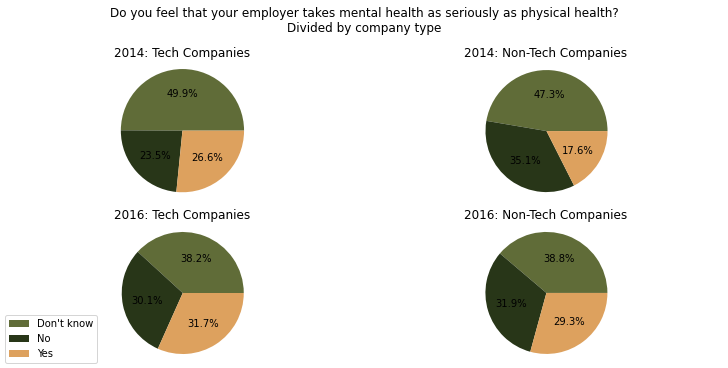

In [49]:
# Set up our plots
fig, axs = plt.subplots(2, 2, figsize=(10,5), constrained_layout=True)

# Dataframes and corresponding titles
q91_dfs = [df_2014_t, df_2014_n, df_2016_t, df_2016_n]
q91_titles = ['2014: Tech Companies', '2014: Non-Tech Companies', '2016: Tech Companies', '2016: Non-Tech Companies']
# Plot the percentage of each response for each pair of df and title
for idx, (df, title) in enumerate(zip(q91_dfs, q91_titles)):
  _y = idx // 2
  _x = idx % 2
  axs[_y, _x].pie(df[['UserID', '91']].groupby('91').count()['UserID'].values, autopct='%1.1f%%', colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
  axs[_y, _x].axis('equal')
  axs[_y, _x].set_title(title)

plt.figlegend(labels=['Don\'t know', 'No', 'Yes'], loc='lower left')
plt.suptitle('Do you feel that your employer takes mental health as seriously as physical health?\nDivided by company type')
# plt.tight_layout()
plt.show()

### Within Tech Companies, comparing between company sizes

For company size 1-5, the number of "No" decreased, while "Yes" increased by the same amount, meaning that there was a great improvment over those 2 years. For company sizes 6-25, 26-100, and 100-500, both "Yes" and "No" responses increased by a similar amount, meaning that there probably wasn't a huge change in the employer taking mental health as seriously as physical health. However, for company sizes 500-1000 and 1000+, the amount of "No" responses increased dramatically, and in the case of 1000+, the number of "Yes" responses decreased. This indicates that these larger companies are taking mental health less serious than physical health.

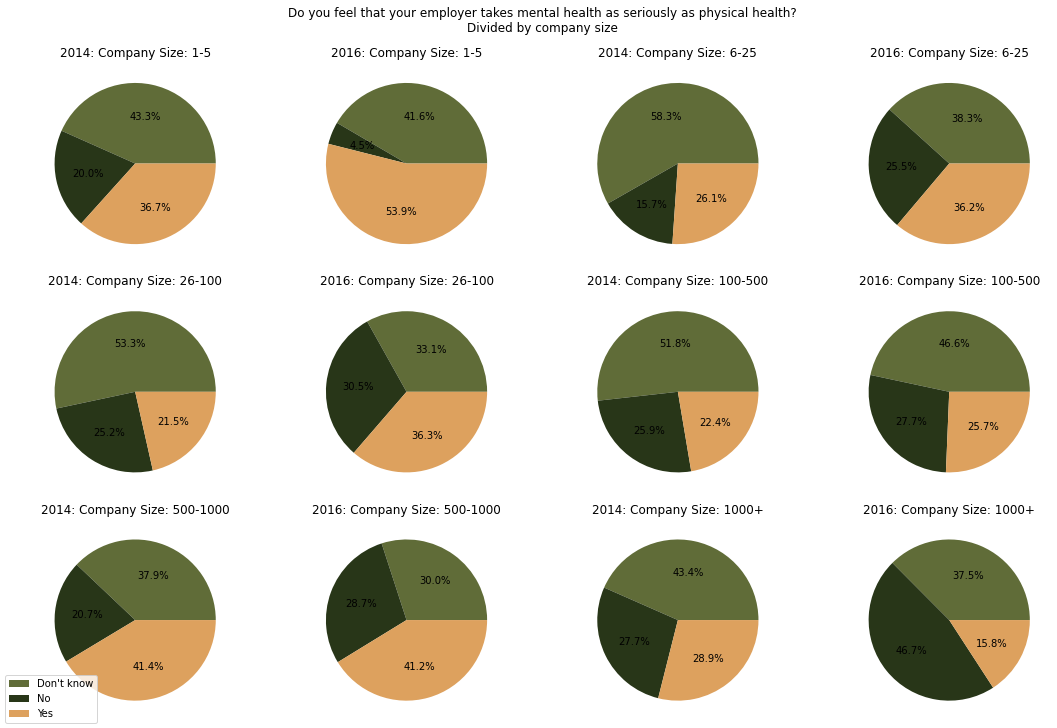

In [57]:
# Set up our plots
fig, axs = plt.subplots(3, 4, figsize=(15, 10), constrained_layout=True)

# Get the pie values
q91_14_size = pie_by_size(df_2014_t, '91')
q91_16_size = pie_by_size(df_2016_t, '91')
# Plot the percentage of each response for each company size
for idx, (k, v) in enumerate(company_size.items()):
    _y = idx // 2
    _x = idx % 2 * 2
    axs[_y, _x].pie(q91_14_size[idx], autopct='%1.1f%%', colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
    axs[_y, _x].set_title('2014: Company Size: ' + v)
    axs[_y, _x + 1].pie(q91_16_size[idx], autopct='%1.1f%%', colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
    axs[_y, _x + 1].set_title('2016: Company Size: ' + v)
    
plt.figlegend(labels=['Don\'t know', 'No', 'Yes'], loc='lower left')
plt.suptitle('Do you feel that your employer takes mental health as seriously as physical health?\nDivided by company size')
# plt.tight_layout()
plt.show()

### Within Tech Companies, comparing between genders

When dividing by gender, both male and female employee's reported "Yes" and "No" increased proportionally over the years. However, for other genders, the amount of "No" responses increased dramatically while "Yes" decreased dramatically from 2014 to 2016. This shows a very negative change in those how employees that are not male or female see their employer taking mental health.

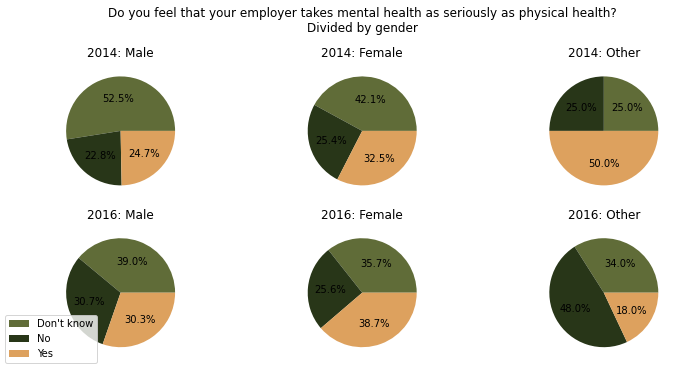

In [52]:
# Set up our figures
fig, axs = plt.subplots(2, 3, figsize=(10,5), constrained_layout=True)

# Get the values for 2014
q91_14_gender = pie_by_gender(df_2014_t, '91')
# Plot the values for 2014
for idx, (dt, title) in enumerate(zip(q91_14, ['Male', 'Female', 'Other'])):
    axs[0, idx].pie(dt, autopct='%1.1f%%', colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
    axs[0, idx].set_title('2014: %s' % title)

# Get the values for 2016
q91_16_gender = pie_by_gender(df_2016_t, '91')
# Plot the values for 2016
for idx, (dt, title) in enumerate(zip(q91_16, ['Male', 'Female', 'Other'])):
    axs[1, idx].pie(dt, autopct='%1.1f%%', colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
    axs[1, idx].set_title('2016: %s' % title)

plt.figlegend(labels=['Don\'t know', 'No', 'Yes'], loc='lower left')
plt.suptitle('Do you feel that your employer takes mental health as seriously as physical health?\nDivided by gender')
# plt.tight_layout()
plt.show()

## Question 96

96 - Does your employer provide resources to learn more about mental health issues and how to seek help?

### Comparing Tech Companies to Non-Tech Companies

In 2014, it looks like tech companies are worse in providing resources in learning more about mental health issues compared to the non-tech counterparts.

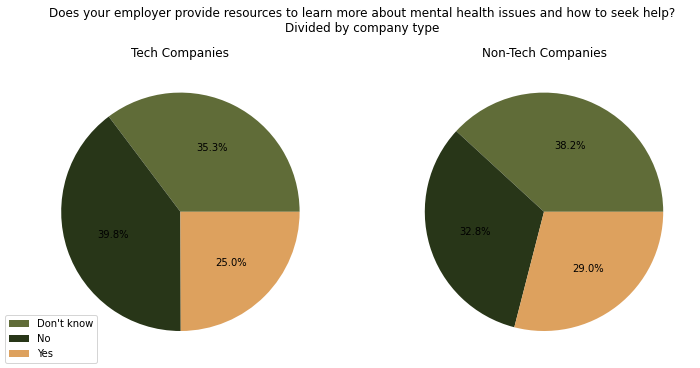

In [53]:
# Set up our figures
figs, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
# Get the values for 2014, 2016
axs[0].pie(df_2014_t[['UserID', '96']].groupby('96').count()['UserID'].values, autopct='%1.1f%%', colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
axs[0].set_title('Tech Companies')
axs[1].pie(df_2014_n[['UserID', '96']].groupby('96').count()['UserID'].values, autopct='%1.1f%%', colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
axs[1].set_title('Non-Tech Companies')

plt.figlegend(labels=['Don\'t know', 'No', 'Yes'], loc='lower left')
plt.suptitle('Does your employer provide resources to learn more about mental health issues and how to seek help?\nDivided by company type')
# plt.tight_layout()
plt.show()

### Within Tech Companies, comparing between companies sizes

In 2014, as tech companies got bigger, they were able to provide more resources to learn about mental health issues. See small companies (of size 1-5) had an overwhelming majority of employees who responded "No", while every size company bigger than that increased the percent "Don't know" responses. It was only until the company size reached 500 employees or more before there were a substantial amount of "Yes" responses.

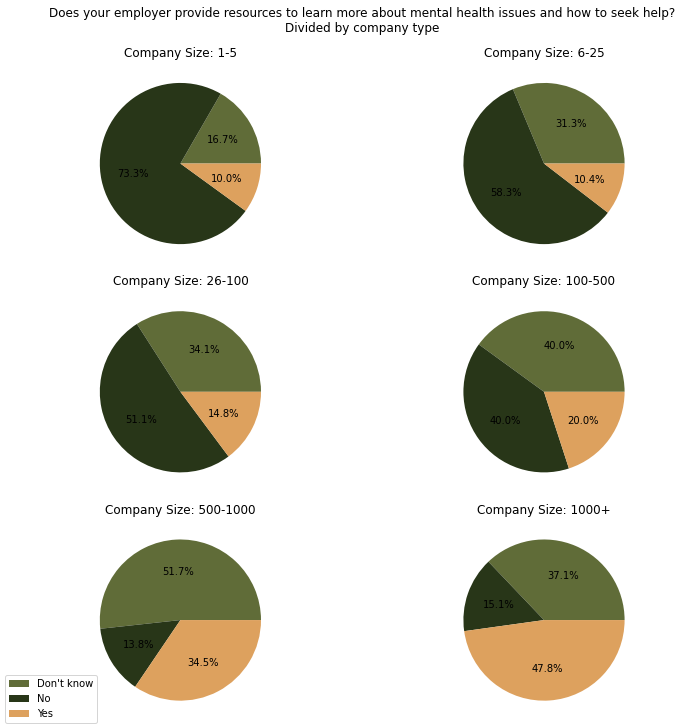

In [54]:
# Get values for each company size
q96_14_size = pie_by_size(df_2014_t, '96')
# Set up our figures
fig, axs = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)
# Plot values for each company size
for index, (k, v) in enumerate(company_size.items()):
    _y = index // 2
    _x = index % 2
    axs[_y, _x].pie(q96_14_size[index], autopct='%1.1f%%', colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
    axs[_y, _x].set_title('Company Size: ' + v)
    
plt.figlegend(labels=['Don\'t know', 'No', 'Yes'], loc='lower left')
plt.suptitle('Does your employer provide resources to learn more about mental health issues and how to seek help?\nDivided by company type')
# plt.tight_layout()
plt.show()

### Within Tech Companies, comparing between genders

Comparing between genders, it looks like employees who do not identify as male or female say that their company doesn't provide or they don't know if their company provides resources to learn more about mental health. For female employees, almost 1/2 of them answer "No" which is also concerning. Male employees shine a more positive light on this situation, however it is not much better. This is definitely an area of improvement that companies can make for all genders, however, especially for those who don't identify as male or female.

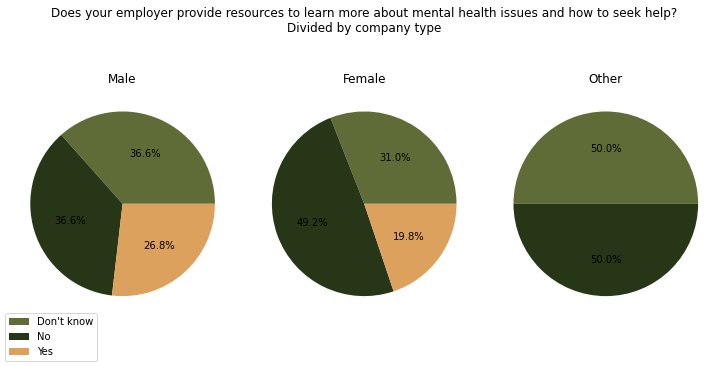

In [55]:
# Set up our plots
fig, axs = plt.subplots(1, 3, figsize=(10,5), constrained_layout=True)
# Get values for each gender
q96_14_gender = pie_by_gender(df_2014_t, '96')
# Plot values for each gender
for idx, (dt, title) in enumerate(zip(q96_14_gender, ['Male', 'Female', 'Other'])):
    axs[idx].pie(dt, autopct='%1.1f%%', colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
    axs[idx].set_title(title)

plt.figlegend(labels=['Don\'t know', 'No', 'Yes'], loc='lower left')
plt.suptitle('Does your employer provide resources to learn more about mental health issues and how to seek help?\nDivided by company type')
# plt.tight_layout()
plt.show()

## Question 104

104 - Do you think that discussing a mental health disorder with your employer would have negative consequences?

### Comparing Tech Companies to Non-Tech Companies

Tech companies, compared to non-tech, have a greater amount of "No" answers and a much less amount of "Yes" answers, meaning that in general, employees of tech companies are less comfortable compared to their peers who work at non-tech companies.

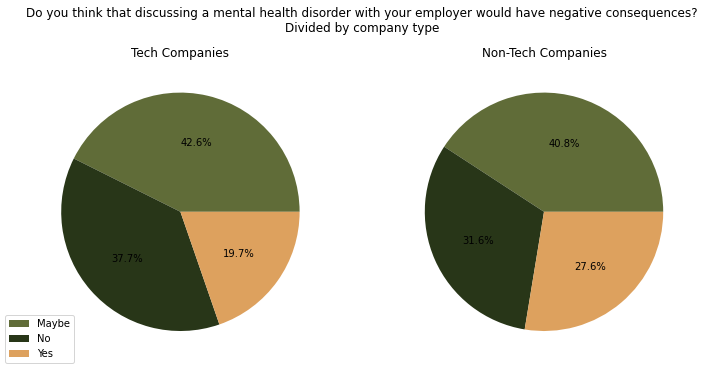

In [56]:
# Set up our figure
fig, axs = plt.subplots(1, 2, figsize=(10,5), constrained_layout=True)
# Plot the values for Tech and Non-Tech companies
for idx, (df, title) in enumerate(zip([df_2016_t, df_2016_n], ['Tech', 'Non-Tech'])):
    axs[idx].pie(df[['UserID', '104']].groupby('104').count()['UserID'].values, autopct='%1.1f%%', colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
    axs[idx].set_title('%s Companies' % title)

plt.figlegend(labels=['Maybe', 'No', 'Yes'], loc='lower left')
plt.suptitle('Do you think that discussing a mental health disorder with your employer would have negative consequences?\nDivided by company type')
# plt.tight_layout()
plt.show()

### Within Tech Companies, comparing between company sizes

Most companies look to have generally low percentage of employees who say "Yes", except for companies that have 1000+ employees, where 36% of them say "Yes." This shows that the very large employer would probably punish or don't care of the workers who do have mental health disorders.

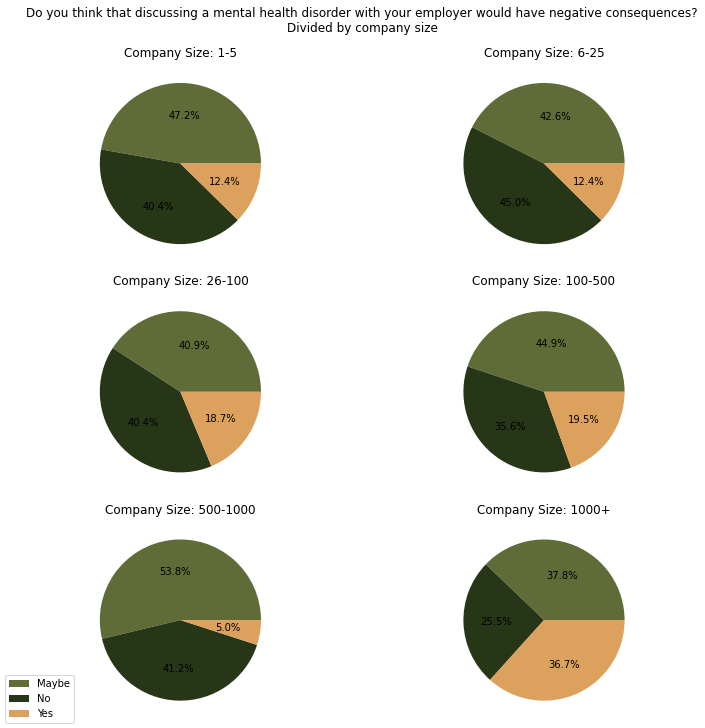

In [38]:
# Set up our plots
fig, axs = plt.subplots(3, 2, figsize=(10, 10), constrained_layout=True)

# Get values for each company size
q104_16 = pie_by_size(df_2016_t, '104')
# Plot values for each company size
for index, (k, v) in enumerate(company_size.items()):
    _y = index // 2
    _x = index % 2
    axs[_y, _x].pie(q104_16[index], autopct='%1.1f%%', colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
    axs[_y, _x].set_title('Company Size: ' + v)
    
plt.figlegend(labels=['Maybe', 'No', 'Yes'], loc='lower left')
plt.suptitle('Do you think that discussing a mental health disorder with your employer would have negative consequences?\nDivided by company size')
# plt.tight_layout()
plt.show()

### Within Tech Companies, comparing between genders

Compared to male and female employees, employees who do not idenfity with either gender see that discussing their mental health disorder would result in negative consquences, which means that their employers are probably not that supportive of their issues.

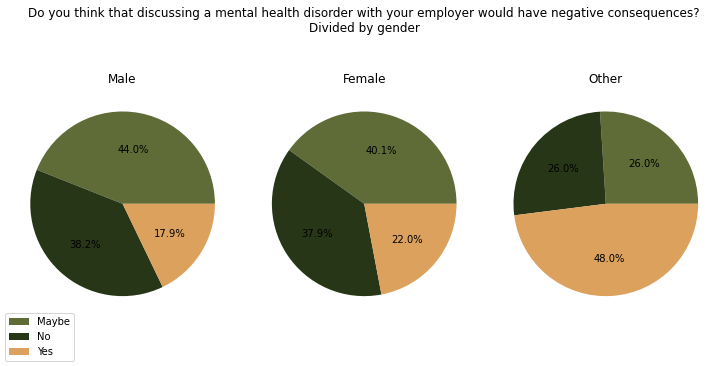

In [41]:
# Set up our plots
fig, axs = plt.subplots(1, 3, figsize=(10,5), constrained_layout=True)

# Get values for each gender
q104_16 = pie_by_gender(df_2016_t, '104')
# Plot values for each gender
for idx, (dt, title) in enumerate(zip(q104_16, ['Male', 'Female', 'Other'])):
    axs[idx].pie(dt, autopct='%1.1f%%', colors=['#606c38', '#283618', '#dda15e', '#bc6c25'])
    axs[idx].set_title(title)

plt.figlegend(labels=['Maybe', 'No', 'Yes'], loc='lower left')
plt.suptitle('Do you think that discussing a mental health disorder with your employer would have negative consequences?\nDivided by gender')
# plt.tight_layout()
plt.show()